In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer


In [74]:
data = pd.read_csv('Credit_dataset.csv')
data

,ID,Credit Given,SEX,EDUCATION,MARRIAGE,AGE,Sept_Pay,Aug_Pay,July_Pay,June_Pay,...,June_Debt,May_Debt,April_Debt,Sept_Paid,Aug_Paid,July_Debt.1,June_Debt.1,May_Paid,April_Paid,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [78]:
#Divide dataset to class
data_1 = data[data['Class']==1]
data_0 = data[data['Class']==0]

In [80]:
data.groupby('Class').size()

Class
0    23364
1     6636
dtype: int64

In [81]:
data_0_sampled = data_0.sample(n=len(data_1),random_state=100)

In [82]:
new_dataset = data_1.append(data_0_sampled)

/var/folders/63/n_3vbd_11pv42y7ssfc049nr0000gn/T/ipykernel_58882/2324610287.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataset = data_1.append(data_0_sampled)


In [83]:
new_dataset.groupby('Class').size()

Class
0    6636
1    6636
dtype: int64

<Axes: >

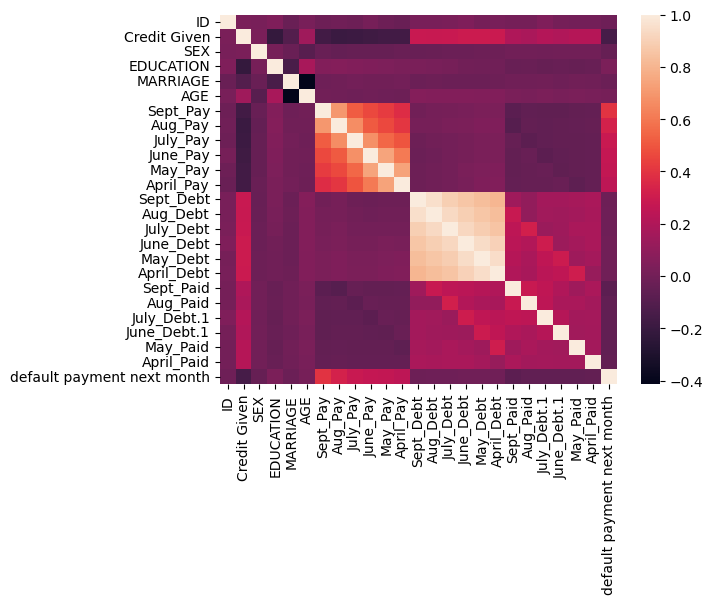

In [6]:
corr = data.corr()
sns.heatmap(corr)

In [8]:
data = data.drop('ID', axis = 1)

In [10]:
scaler = Normalizer()

In [84]:
#Initialize transformation method

scaler.fit(new_dataset)

Normalizer()

In [85]:
#Transform independent features

data_scale = scaler.transform(new_dataset)

In [86]:
#=======Normalization==========
#Select all features


features = new_dataset.drop(['Class'], axis =1)

In [87]:

Class = new_dataset['Class']

In [88]:
#Normalization

scaler = Normalizer()
scaler.fit(features)

Normalizer()

In [89]:
scaled_features = scaler.transform(features)

In [90]:
scaled_features

array([[4.84567556e-05, 9.69135113e-01, 9.69135113e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.66334102e-05, 9.98004610e-01, 1.66334102e-05, ...,
        8.31670508e-03, 0.00000000e+00, 1.66334102e-02],
       [8.81174652e-05, 4.40587326e-01, 6.29410466e-06, ...,
        1.88823140e-02, 9.44115699e-03, 0.00000000e+00],
       ...,
       [4.93486711e-01, 8.65614298e-01, 3.46245719e-05, ...,
        2.07747431e-02, 3.23566624e-02, 6.24973523e-02],
       [3.05706372e-02, 9.45262147e-01, 4.29664612e-06, ...,
        3.00765228e-02, 4.72631073e-02, 1.28899384e-02],
       [7.54250558e-02, 9.89667782e-01, 3.09271182e-06, ...,
        4.72349876e-02, 4.98112166e-02, 2.99683775e-02]])

In [91]:
columns = features.columns
columns

Index(['ID', 'Credit Given', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Sept_Pay',
       'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay', 'April_Pay', 'Sept_Debt',
       'Aug_Debt', 'July_Debt', 'June_Debt', 'May_Debt', 'April_Debt',
       'Sept_Paid', 'Aug_Paid', 'July_Debt.1', 'June_Debt.1', 'May_Paid',
       'April_Paid'],
      dtype='object')

In [92]:
#Convert scaled features to dataframe
df_features = pd.DataFrame(scaled_features,columns=columns)

In [93]:
df_features

,ID,Credit Given,SEX,EDUCATION,MARRIAGE,AGE,Sept_Pay,Aug_Pay,July_Pay,June_Pay,...,July_Debt,June_Debt,May_Debt,April_Debt,Sept_Paid,Aug_Paid,July_Debt.1,June_Debt.1,May_Paid,April_Paid
0,0.000048,0.969135,0.000097,0.000097,0.000048,0.001163,0.000097,0.000097,0.000000,0.000000,...,0.033387,0.000000,0.000000,0.000000,0.000000,0.033387,0.000000,0.000000,0.000000,0.000000
1,0.000017,0.998005,0.000017,0.000017,0.000017,0.000216,0.000000,0.000017,0.000000,0.000000,...,0.022305,0.027212,0.028734,0.027121,0.000000,0.008317,0.008317,0.008317,0.000000,0.016633
2,0.000088,0.440587,0.000006,0.000013,0.000013,0.000189,0.000006,0.000013,0.000013,0.000000,...,0.413529,0.420333,0.227450,0.232215,0.020141,0.000000,0.018882,0.018882,0.009441,0.000000
3,0.000354,0.416887,0.000021,0.000021,0.000042,0.000500,0.000000,0.000000,0.000042,0.000042,...,0.363275,0.382244,0.373218,0.398211,0.066702,0.000000,0.031267,0.000000,0.034393,0.000000
4,0.000183,0.999948,0.000017,0.000017,0.000008,0.000325,0.000000,0.000000,0.000000,0.000000,...,0.002633,0.000000,0.005266,0.002633,0.002633,0.002633,0.000000,0.005266,0.002633,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,0.041426,0.995935,0.000005,0.000009,0.000005,0.000186,0.000000,0.000000,0.000000,0.000000,...,0.026818,0.007963,0.008257,0.031788,0.030073,0.026818,0.007963,0.008257,0.031788,0.011385
13268,0.042288,0.576406,0.000004,0.000002,0.000002,0.000082,0.000000,0.000000,0.000000,0.000000,...,0.346500,0.346394,0.267182,0.271906,0.022169,0.017736,0.011147,0.011085,0.011085,0.022169
13269,0.493487,0.865614,0.000035,0.000052,0.000052,0.000796,0.000000,0.000000,0.000000,0.000000,...,0.006752,0.006752,0.020775,0.032357,0.006752,0.006752,0.006752,0.020775,0.032357,0.062497
13270,0.030571,0.945262,0.000004,0.000004,0.000004,0.000150,0.000000,0.000000,0.000000,0.000000,...,0.109406,0.120461,0.148458,0.188309,0.008593,0.017187,0.012890,0.030077,0.047263,0.012890


In [94]:
#Add class column to scaled dataset
df_features['Class'] = Class

In [24]:
#=============Create Model===================

In [25]:
#Split Test and Train 

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [117]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, Class, test_size=0.30, random_state=42)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
model = LogisticRegression(max_iter=500)

In [100]:
model.fit (X_train, y_train)

LogisticRegression(max_iter=500)

In [101]:
predictions = model.predict(X_test)

In [102]:
predictions

array([1, 1, 0, ..., 1, 0, 0])

In [103]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [104]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))     

[[1304  668]
 [ 918 1092]]
              precision    recall  f1-score   support

           0       0.59      0.66      0.62      1972
           1       0.62      0.54      0.58      2010

    accuracy                           0.60      3982
   macro avg       0.60      0.60      0.60      3982
weighted avg       0.60      0.60      0.60      3982



In [105]:
#==========Neural Network=====

In [118]:
from sklearn.neural_network import MLPClassifier


In [119]:
nn = MLPClassifier(hidden_layer_sizes=(300,50), activation='relu',verbose=1)

In [123]:
nn.fit(X_train, y_train)

Iteration 1, loss = 0.67394401
Iteration 2, loss = 0.66059996
Iteration 3, loss = 0.65874370
Iteration 4, loss = 0.65149896
Iteration 5, loss = 0.64990112
Iteration 6, loss = 0.64809304
Iteration 7, loss = 0.64686679
Iteration 8, loss = 0.64704044
Iteration 9, loss = 0.64369838
Iteration 10, loss = 0.64366921
Iteration 11, loss = 0.64141164
Iteration 12, loss = 0.64059012
Iteration 13, loss = 0.64103597
Iteration 14, loss = 0.63948243
Iteration 15, loss = 0.63766402
Iteration 16, loss = 0.63630611
Iteration 17, loss = 0.63823876
Iteration 18, loss = 0.63567595
Iteration 19, loss = 0.63596005
Iteration 20, loss = 0.63565854
Iteration 21, loss = 0.63439192
Iteration 22, loss = 0.63627834
Iteration 23, loss = 0.63255445
Iteration 24, loss = 0.63255337
Iteration 25, loss = 0.63269025
Iteration 26, loss = 0.63123035
Iteration 27, loss = 0.63322380
Iteration 28, loss = 0.63037595
Iteration 29, loss = 0.63172294
Iteration 30, loss = 0.62928832
Iteration 31, loss = 0.62837192
Iteration 32, los

/Users/folarinoladimeji/Applications/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(300, 50), verbose=1)

In [124]:
prediction = nn.predict(X_test)

In [125]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[1337  635]
 [ 739 1271]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      1972
           1       0.67      0.63      0.65      2010

    accuracy                           0.65      3982
   macro avg       0.66      0.66      0.65      3982
weighted avg       0.66      0.65      0.65      3982



In [126]:
#==========KNN================

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn = KNeighborsClassifier(n_neighbors=2)

In [129]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [130]:
prediction = knn.predict(X_test)

In [131]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[1582  390]
 [1373  637]]
              precision    recall  f1-score   support

           0       0.54      0.80      0.64      1972
           1       0.62      0.32      0.42      2010

    accuracy                           0.56      3982
   macro avg       0.58      0.56      0.53      3982
weighted avg       0.58      0.56      0.53      3982



In [132]:
#==========SVM=====

In [133]:
from sklearn.svm import SVC

In [134]:
svc = SVC()

In [135]:
svc.fit(X_train, y_train)

SVC()

In [136]:
prediction = svc.predict(X_test)

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[1283  689]
 [ 905 1105]]
              precision    recall  f1-score   support

           0       0.59      0.65      0.62      1972
           1       0.62      0.55      0.58      2010

    accuracy                           0.60      3982
   macro avg       0.60      0.60      0.60      3982
weighted avg       0.60      0.60      0.60      3982

